In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
path = r'D:\SLU\AI MSc\Repos\Projects\Churn\Telco-Customer-Churn.csv'
data = pd.read_csv(path)
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Columns need to be converted to numeric.

In [4]:
# Number of unique values in each column
for col in data.columns:
    print(f'Column {col}: ')
    print(f'Number of unique entries: {data[{col}].nunique()[0]}\n')

Column customerID: 
Number of unique entries: 7043

Column gender: 
Number of unique entries: 2

Column SeniorCitizen: 
Number of unique entries: 2

Column Partner: 
Number of unique entries: 2

Column Dependents: 
Number of unique entries: 2

Column tenure: 
Number of unique entries: 73

Column PhoneService: 
Number of unique entries: 2

Column MultipleLines: 
Number of unique entries: 3

Column InternetService: 
Number of unique entries: 3

Column OnlineSecurity: 
Number of unique entries: 3

Column OnlineBackup: 
Number of unique entries: 3

Column DeviceProtection: 
Number of unique entries: 3

Column TechSupport: 
Number of unique entries: 3

Column StreamingTV: 
Number of unique entries: 3

Column StreamingMovies: 
Number of unique entries: 3

Column Contract: 
Number of unique entries: 3

Column PaperlessBilling: 
Number of unique entries: 2

Column PaymentMethod: 
Number of unique entries: 4

Column MonthlyCharges: 
Number of unique entries: 1585

Column TotalCharges: 
Number o

CustomerID column can be dropped as it is the identifier of each column

In [5]:
# Dropping custumerID column
data.drop('customerID', axis=1, inplace=True)

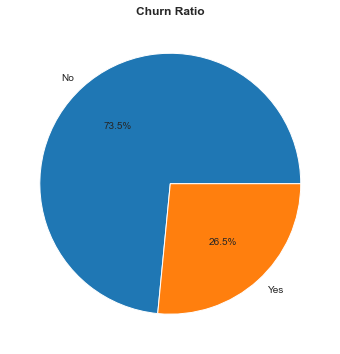

In [6]:
sns.set_style("whitegrid")
f, ax = plt.subplots(figsize = (10, 6))
ax.pie(data.Churn.value_counts(), 
       labels = data.Churn.unique(), 
       autopct='%1.1f%%')
ax.set_title('churn ratio'.title(), weight = 'bold')
plt.show()

Data is imbalanced. The churn ratio is 1:4

In [7]:
# Missing values check
data.isnull().mean()


gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64

In [8]:
# Missing valuer in "TotalCharges" column
data[data.TotalCharges.str.len() < 2]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


Since the number of missing values is negligible, and considering that all of them are from majority class, we can drop them.

In [9]:
missing_vals_ind = data[data.TotalCharges.str.len() < 2].index
data.drop(missing_vals_ind, inplace=True)
data.reset_index(drop=True, inplace=True)

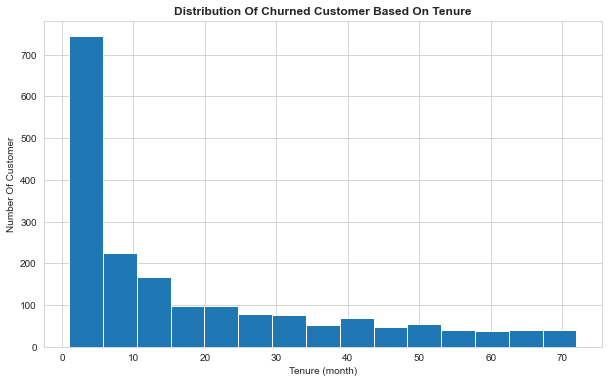

In [10]:
# Distribution of churned customer based on tenure
f, ax = plt.subplots(figsize = (10,6))
ax.hist(data[data['Churn'] == 'Yes']['tenure'], bins=15)
ax.set_title('distribution of churned customer based on tenure'.title(), weight = 'bold')
ax.set_ylabel('number of customer'.title())
ax.set_xlabel('Tenure (month)')
plt.show()

The chance of churn is higher in recent customers.

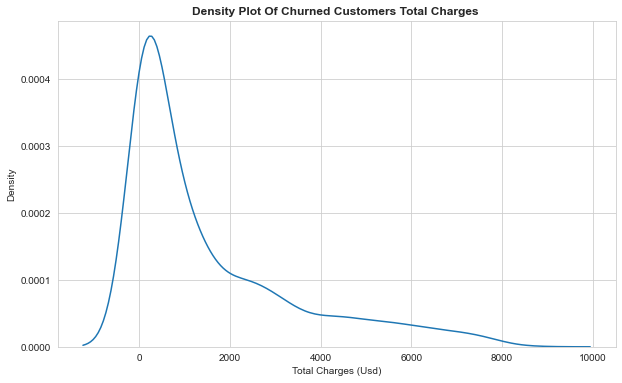

In [11]:
# Density plot of churned customers total charges 
_ = data[data.Churn == 'Yes']['TotalCharges'].astype('float')
f, ax = plt.subplots(figsize = (10,6))
sns.kdeplot(_)
ax.set_title('Density plot of churned customers total charges '.title(), weight = 'bold')
ax.set_xlabel('total charges (USD)'.title())
plt.show()

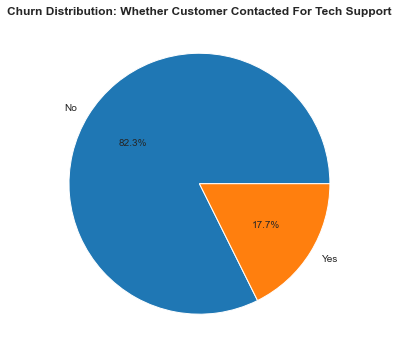

In [12]:
# churn distribution: whether customer contacted for tech support
stat = ['Yes', 'No']
tech_s = data[(data.Churn == 'Yes') & (data.TechSupport.isin(stat))]['TechSupport']

sns.set_style("whitegrid")
f, ax = plt.subplots(figsize = (10, 6))
ax.pie(tech_s.value_counts(), 
       labels = tech_s.unique(), 
       autopct='%1.1f%%')
ax.set_title('churn distribution: whether customer contacted for tech support'.title(), weight = 'bold')
plt.show()

In [13]:
# Transform categorical data to numeric
from sklearn.preprocessing import LabelEncoder
data['TotalCharges'] = data['TotalCharges'].astype('float')
cols_to_exclude = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']        # Already numeric 
cols_to_numeric = data.columns.difference(cols_to_exclude)
le = LabelEncoder()
for col in cols_to_numeric:
    data[col] = le.fit_transform(data[col])

In [14]:
# Normalize data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
for col in cols_to_exclude:
    data[col] = scaler.fit_transform(data[[col]])

In [15]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0.0,1,0,0.000000,0,1,0,0,2,0,0,0,0,0,1,2,0.115423,0.001275,0
1,1,0.0,0,0,0.464789,1,0,0,2,0,2,0,0,0,1,0,3,0.385075,0.215867,0
2,1,0.0,0,0,0.014085,1,0,0,2,2,0,0,0,0,0,1,3,0.354229,0.010310,1
3,1,0.0,0,0,0.619718,0,1,0,2,0,2,2,0,0,1,0,0,0.239303,0.210241,0
4,0,0.0,0,0,0.014085,1,0,1,0,0,0,0,0,0,0,1,2,0.521891,0.015330,1
